<a href="https://colab.research.google.com/github/Chrisalex02/Python_practices/blob/main/Treading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Otener los Datos Del Mercado 

In [ ]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import pandas_datareader.data as web
!pip install ffn
import ffn
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#De Aqui Salen Los Datos
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Obteniendo Datos
Microsoft = yf.Ticker("MSFT").history(period='5y')
Apple= yf.Ticker("AAPL").history(period='5y')
JPMorgan= yf.Ticker("JPM").history(period='5y')

#Analisis Estadistico Basico 

In [ ]:
Microsoft = yf.Ticker("MSFT").history(period='5y')
MSFT=Microsoft['Close']

In [ ]:
MSFT.mean()

181.84464923231445

In [ ]:
MSFT.median()

168.44705200195312

In [ ]:
MSFT.mode()

0      68.838760
1      71.685883
2      78.160072
3      78.977577
4      90.136467
5      96.111229
6      98.761703
7     101.551010
8     101.864822
9     102.230179
10    104.812958
11    106.860062
12    131.962708
13    133.616669
14    134.199615
15    134.509552
16    135.151810
17    153.462494
18    204.149094
19    215.854935
20    253.541840
21    292.401154
22    298.171173
dtype: float64

In [ ]:
MSFT.describe()

count    1259.000000
mean      181.844649
std        78.906552
min        68.838760
25%       104.856010
50%       168.447052
75%       253.167625
max       340.882782
Name: Close, dtype: float64

**Creando Un Histograma**

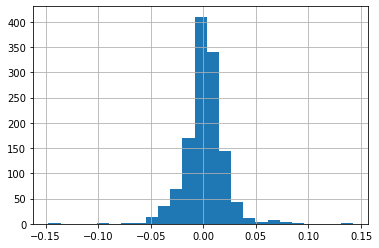

In [ ]:
msft_return= MSFT.pct_change(1)
msft_return.hist(bins=25)


In [ ]:
msft_return.hist(bins=25)
plt.plt.ylabel('Frequency')xlabel('MSFT Return')


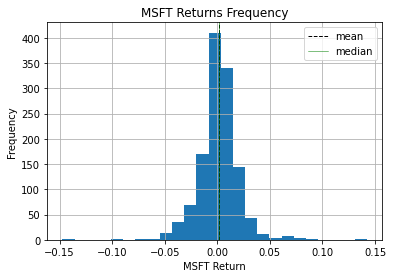

In [ ]:
msft_return= MSFT.pct_change(1)
msft_return.hist(bins=25)
plt.xlabel('MSFT Return')
plt.ylabel('Frequency')
plt.title('MSFT Returns Frequency')
plt.axvline(msft_return.mean(), color='k', linestyle='dashed', linewidth=1, label =
'mean')
plt.axvline(msft_return.median(), color='g', linewidth=0.5,label='median')
plt.legend()

In [ ]:
msft_return.skew()

-0.042288092556314466

In [ ]:
msft_return.kurtosis()[]

7.601855119952845

In [ ]:
AAPL=Apple["Close"]
aapl_return= AAPL.pct_change(1)

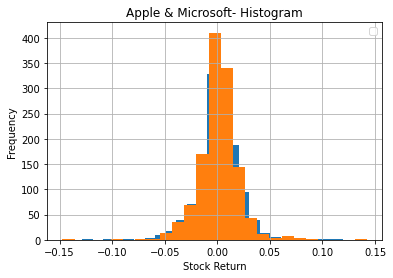

In [ ]:
aapl_return= AAPL.pct_change(1)
aapl_return.hist(bins=25)
msft_return= MSFT.pct_change(1)
msft_return.hist(bins=25)
plt.xlabel('Stock Return')
plt.ylabel('Frequency')
plt.title('Apple & Microsoft- Histogram')
plt.legend()

#Comparacion Visual Y estadistica 

In [ ]:
JPMorgan= yf.Ticker("JPM").history(period='5y')
JPM= JPMorgan['Close']

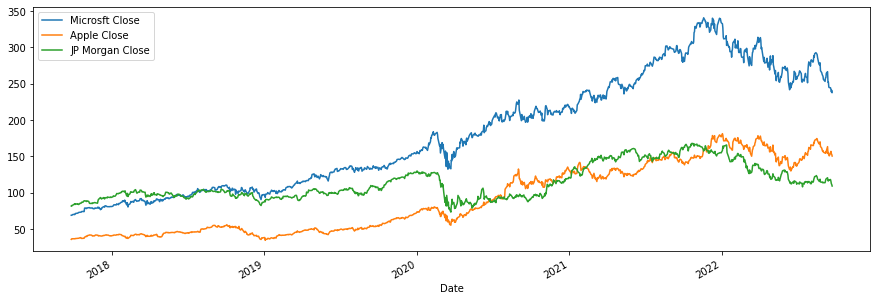

In [ ]:
MSFT.plot(label='Microsft Close', figsize=(15,5))
AAPL.plot(label='Apple Close', figsize=(15,5))
JPM.plot(label='JP Morgan Close', figsize=(15,5))
plt.legend()


In [ ]:
range_returns = MSFT.max() - MSFT.min()
range_returns

272.0440216064453

In [ ]:
MSFT_Q1= MSFT.quantile(0.25)
MSFT_Q3= MSFT.quantile(0.75)
MSFT_IQR= MSFT_Q3-MSFT_Q1
MSFT_IQR

148.31161499023438

In [ ]:
MSFT_Outlier_high = MSFT_Q3 + 1.5 * MSFT_IQR
MSFT_oulier_low = MSFT_Q1 - 1.5 * MSFT_IQR
MSFT_oulier_low
MSFT_Outlier_high

475.63504791259766

Text(0.5, 1.0, 'Microsoft & Apple - Boxplot')

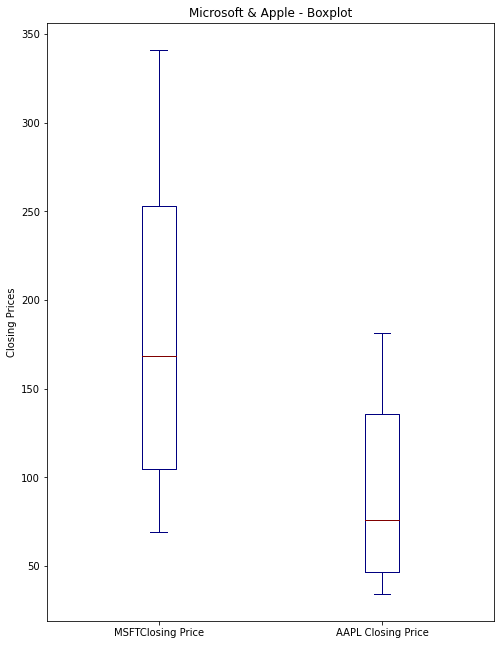

In [ ]:
united_box = pd.concat([MSFT,AAPL],axis=1)
united_box.columns = ['MSFTClosing Price','AAPL Closing Price']
united_box.plot(kind='box',figsize=(8,11),colormap='jet')
plt.ylabel('Closing Prices')
plt.title('Microsoft & Apple - Boxplot')


In [ ]:
msft_return.var()

0.00035580543124000453

In [ ]:
msft_return.std()

0.018862805497592467

In [ ]:
stock= pd.concat([msft_return, aapl_return],axis=1)
stock.columns= ['MSFT_return','AAPL_return']
stock

,MSFT_return,AAPL_return
Date,,
2017-09-25,NaN,NaN
2017-09-26,0.000000,0.017204
2017-09-27,0.008053,0.007117
2017-09-28,0.000271,-0.006160
2017-09-29,0.008393,0.005480
...,...,...
2022-09-19,-0.000899,0.025083
2022-09-20,-0.008466,0.015665
2022-09-21,-0.014436,-0.020268


In [ ]:
stock.cov()

,MSFT_return,AAPL_return
MSFT_return,0.000356,0.000293
AAPL_return,0.000293,0.000416


In [ ]:
stock.cov()*252

,MSFT_return,AAPL_return
MSFT_return,0.089663,0.073942
AAPL_return,0.073942,0.104947


In [ ]:
stock.corr()

,MSFT_return,AAPL_return
MSFT_return,1.000000,0.762251
AAPL_return,0.762251,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6b8da6550>,
      dtype=object)

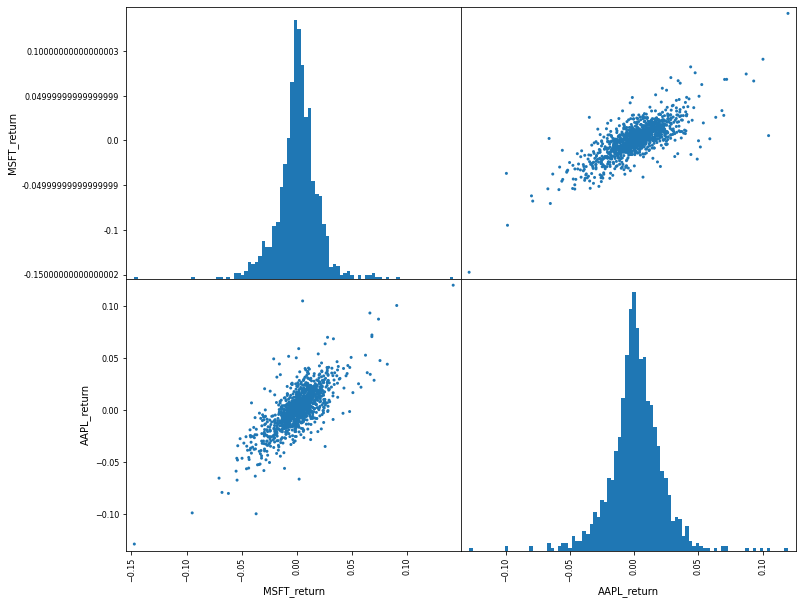

In [ ]:
stock= pd.concat([msft_return, aapl_return],axis=1)
stock.columns= ['MSFT_return','AAPL_return']
from pandas.plotting import scatter_matrix
scatter_matrix(stock,figsize=(12,10),alpha=1.0,hist_kwds={'bins':90})

Text(0.5, 1.0, 'MSFT and AAPL Heatmap')

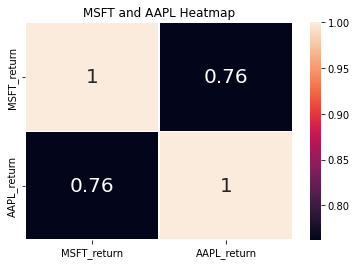

In [ ]:
import seaborn as sns
correlation= stock.corr()
sns.heatmap(correlation,annot=True,cmap=None, linewidths=0.3,annot_kws={"size": 20})
plt.title('MSFT and AAPL Heatmap')


#Analisis Tecnico

In [ ]:
Microsoft = yf.Ticker("MSFT").history(period='5y')
Microsoft['Close'].argmin()

0

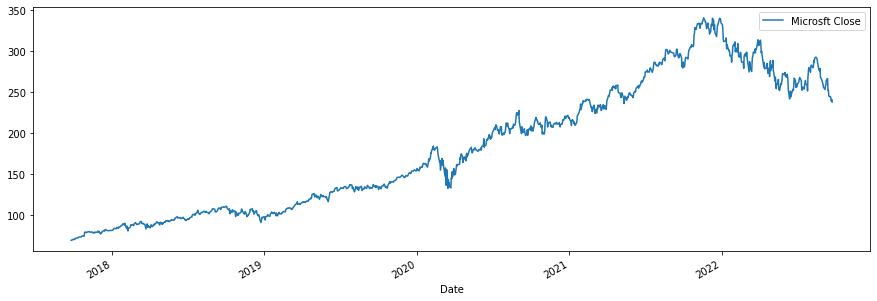

In [ ]:
MSFT.plot(label='Microsft Close', figsize=(15,5))
plt.legend()


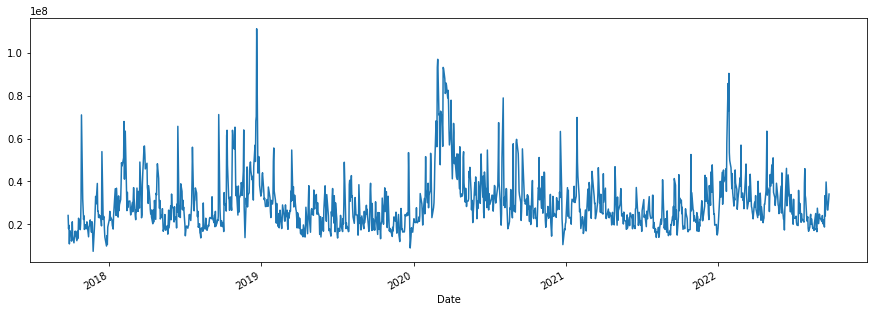

In [ ]:
Microsoft['Volume'].plot(label='Microsft Volume', figsize=(15,5))


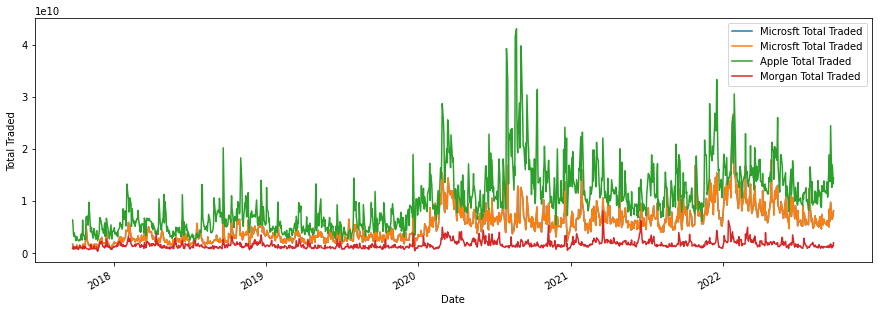

In [ ]:
Microsoft_ttl_trded= Microsoft['Volume']* Microsoft['Close']

Microsoft_ttl_trded.plot(label='Microsft Total Traded', figsize=(15,5))
Apple_ttl_traded= Apple['Close']* Apple['Volume']
Morgan_ttl_traded= JPMorgan['Close']* JPMorgan['Volume']
Microsoft_ttl_trded.plot(label='Microsft Total Traded', figsize=(15,5))
Apple_ttl_traded.plot(label='Apple Total Traded', figsize=(15,5))
Morgan_ttl_traded.plot(label='Morgan Total Traded', figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.legend()

In [ ]:
!pip install mplfinance 
import mplfinance as mfp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 4.9 MB/s 


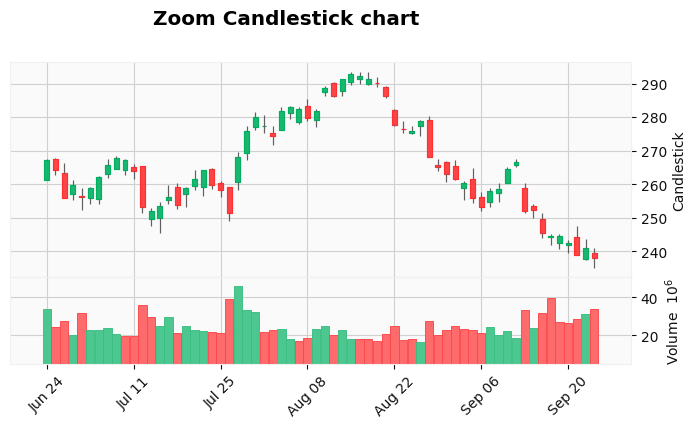

In [ ]:
kwargs = dict(type='candle', title ='Zoom Candlestick chart',ylabel='Candlestick',figratio=(30,15),figscale=0.75, volume=True)
Microsoft = yf.Ticker("MSFT").history(period='3mo')
mfp.plot(Microsoft,**kwargs,style='yahoo')

In [ ]:
Microsoft = yf.Ticker("MSFT").history(period='5y')

**Analisis avanzado**

In [ ]:
MSFT_MA_50=Microsoft['Close'].rolling(50).mean()
AAPL_MA_50=Apple['Close'].rolling(50).mean()
JPM_MA_50=JPMorgan['Close'].rolling(50).mean()
MSFT_MA_100=Microsoft['Close'].rolling(100).mean()
AAPL_MA_100=Apple['Close'].rolling(100).mean()
JPM_MA_100=JPMorgan['Close'].rolling(100).mean()
MSFT_MA_200=Microsoft['Close'].rolling(200).mean()
AAPL_MA_200=Apple['Close'].rolling(200).mean()
JPM_MA_200=JPMorgan['Close'].rolling(200).mean()

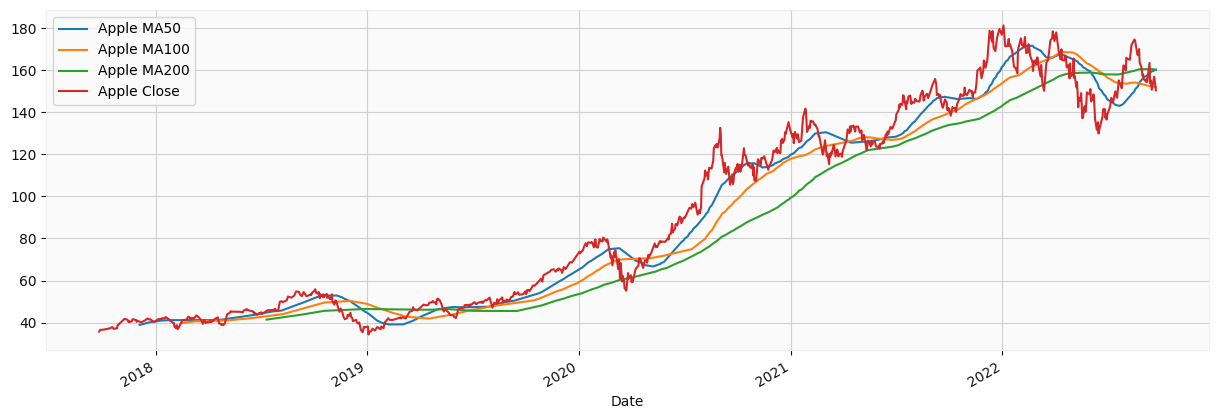

In [ ]:
AAPL_MA_50.plot(label='Apple MA50', figsize=(15,5))
AAPL_MA_100.plot(label='Apple MA100', figsize=(15,5))
AAPL_MA_200.plot(label='Apple MA200', figsize=(15,5))
AAPL.plot(label='Apple Close', figsize=(15,5))
plt.legend()

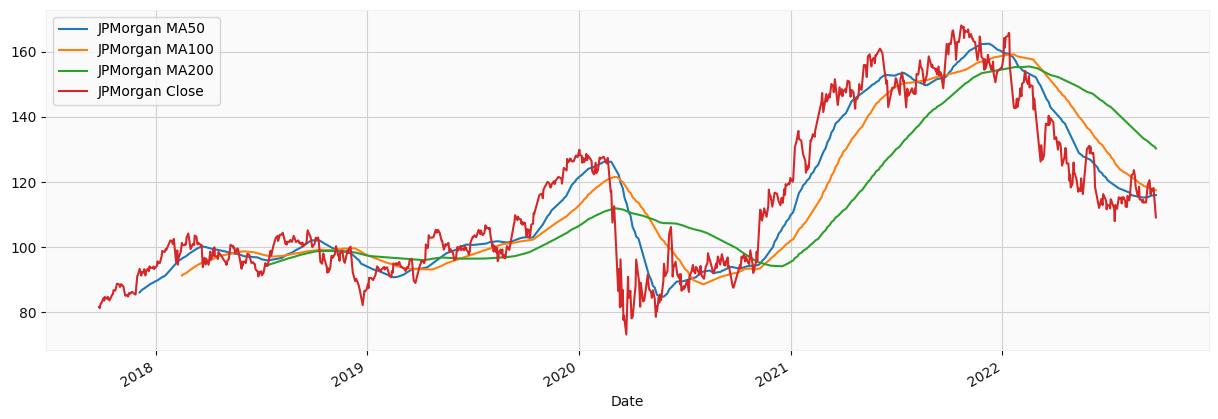

In [ ]:
JPM_MA_50.plot(label='JPMorgan MA50', figsize=(15,5))
JPM_MA_100.plot(label='JPMorgan MA100', figsize=(15,5))
JPM_MA_200.plot(label='JPMorgan MA200', figsize=(15,5))
JPM.plot(label='JPMorgan Close', figsize=(15,5))
plt.legend()

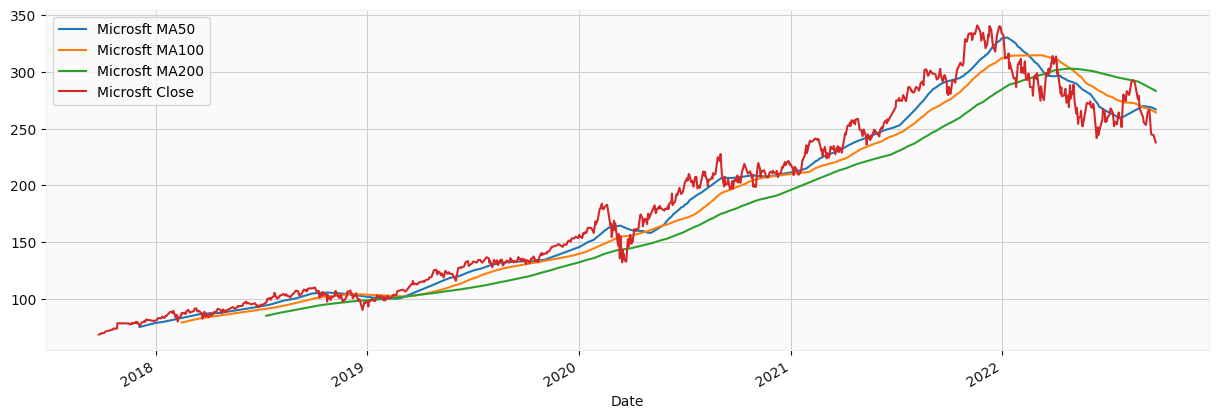

In [ ]:
MSFT_MA_50.plot(label='Microsft MA50', figsize=(15,5))
MSFT_MA_100.plot(label='Microsft MA100', figsize=(15,5))
MSFT_MA_200.plot(label='Microsft MA200', figsize=(15,5))
MSFT.plot(label='Microsft Close', figsize=(15,5))
plt.legend()

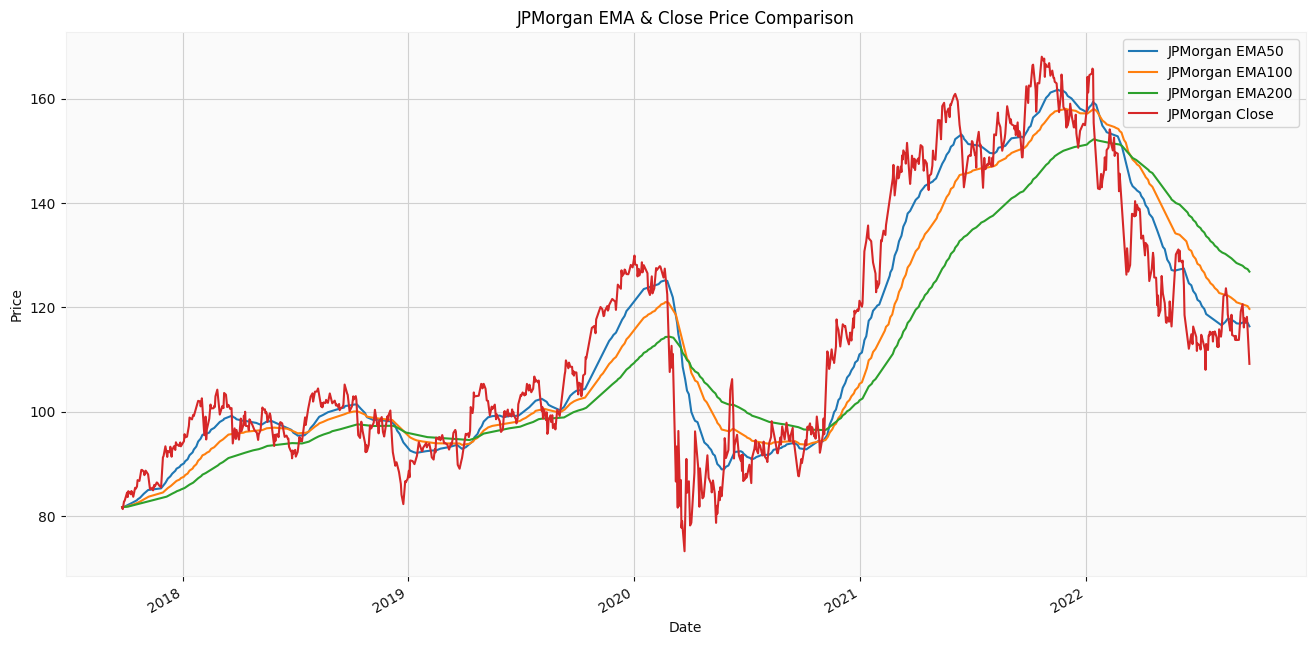

In [ ]:
JPMorgan['EMA50'] = JPMorgan['Close'].ewm(span=50, adjust=False).mean()
JPMorgan['EMA100'] = JPMorgan['Close'].ewm(span=100, adjust=False).mean()
JPMorgan['EMA200'] = JPMorgan['Close'].ewm(span=200, adjust=False).mean()
JPMorgan['EMA50'].plot(label='JPMorgan EMA50',figsize=(16,8))
JPMorgan['EMA100'].plot(label='JPMorgan EMA100')
JPMorgan['EMA200'].plot(label='JPMorgan EMA200')
JPMorgan['Close'].plot(label='JPMorgan Close')
_ = plt.xlabel('Date')
_ = plt.ylabel('Price')
_ = plt.title('JPMorgan EMA & Close Price Comparison')
plt.legend()

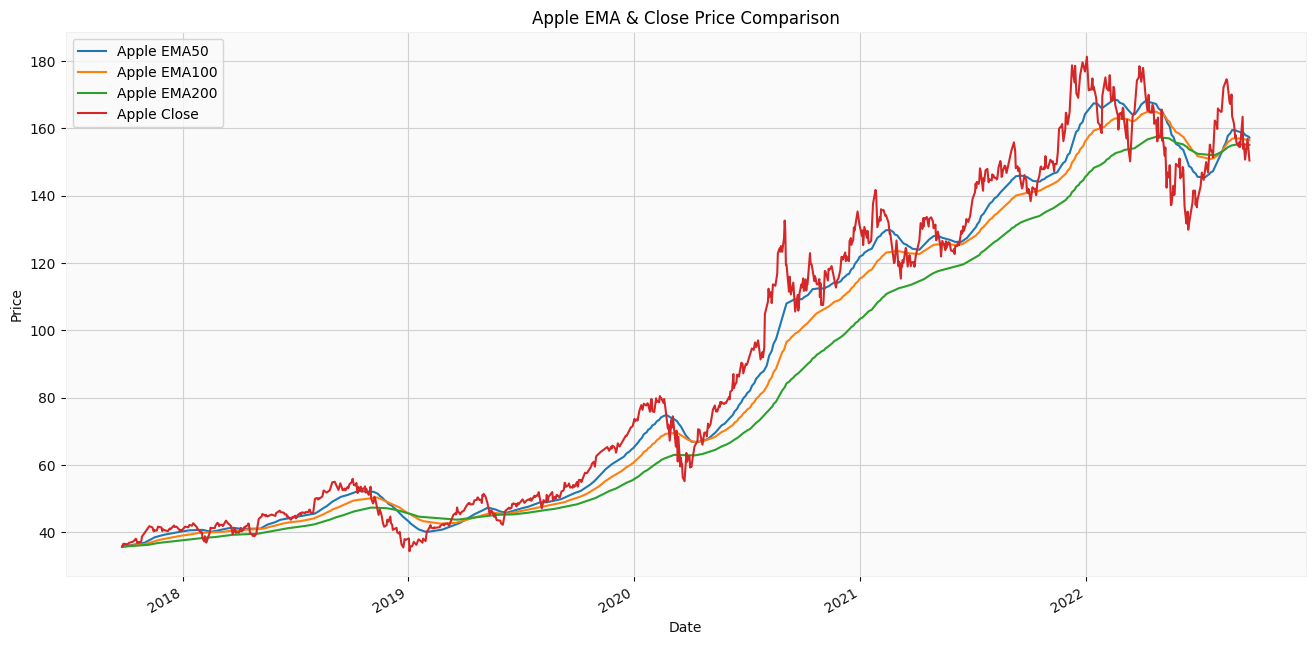

In [ ]:
Apple['EMA50'] = Apple['Close'].ewm(span=50, adjust=False).mean()
Apple['EMA100'] = Apple['Close'].ewm(span=100, adjust=False).mean()
Apple['EMA200'] = Apple['Close'].ewm(span=200, adjust=False).mean()
Apple['EMA50'].plot(label='Apple EMA50',figsize=(16,8))
Apple['EMA100'].plot(label='Apple EMA100')
Apple['EMA200'].plot(label='Apple EMA200')
Apple['Close'].plot(label='Apple Close')
_ = plt.xlabel('Date')
_ = plt.ylabel('Price')
_ = plt.title('Apple EMA & Close Price Comparison')
plt.legend()

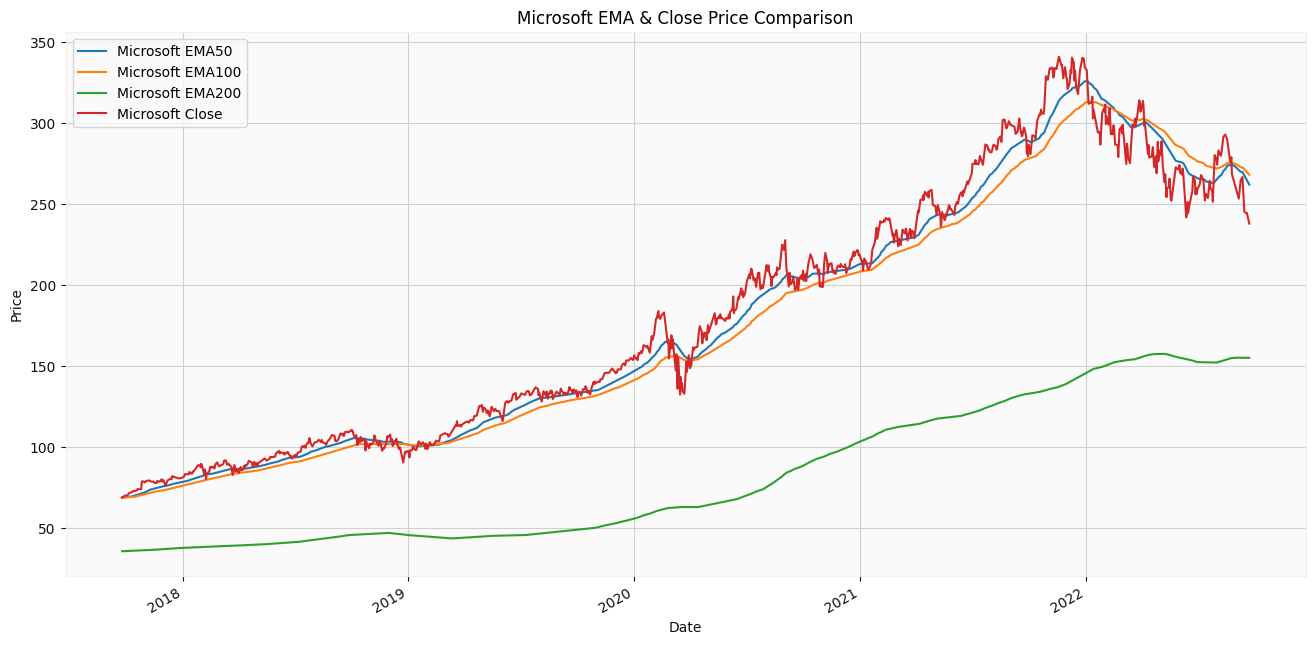

In [ ]:
Microsoft['EMA50'] = Microsoft['Close'].ewm(span=50, adjust=False).mean()
Microsoft['EMA100'] = Microsoft['Close'].ewm(span=100, adjust=False).mean()
Microsoft['EMA200'] = Apple['Close'].ewm(span=200, adjust=False).mean()
Microsoft['EMA50'].plot(label='Microsoft EMA50',figsize=(16,8))
Microsoft['EMA100'].plot(label='Microsoft EMA100')
Microsoft['EMA200'].plot(label='Microsoft EMA200')
Microsoft['Close'].plot(label='Microsoft Close')
_ = plt.xlabel('Date')
_ = plt.ylabel('Price')
_ = plt.title('Microsoft EMA & Close Price Comparison')
plt.legend()

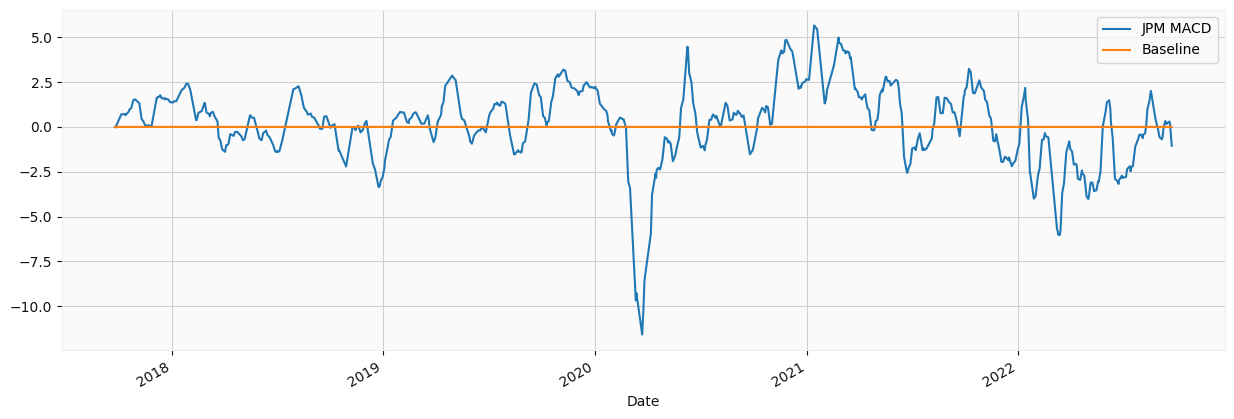

In [ ]:
JPMorgan['MACD']= JPMorgan['Close'].ewm(span=12, adjust=False).mean()-  JPMorgan['Close'].ewm(span=26, adjust=False).mean()
JPMorgan['Baseline']=0

JPMorgan['MACD'].plot(label='JPM MACD', figsize=(15,5))
JPMorgan['Baseline'].plot(label='Baseline')
plt.legend()

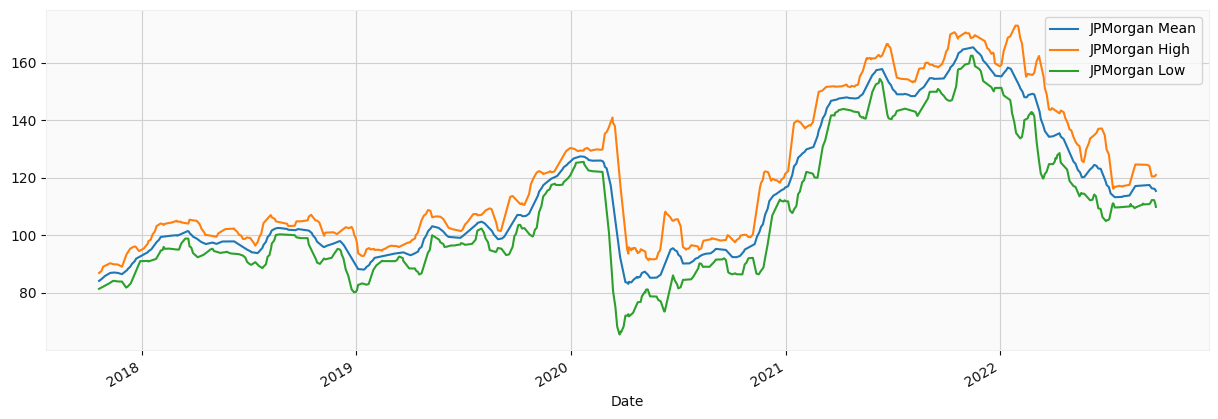

In [ ]:
window_of_days= 20
number_std=2
rolling_mean= JPMorgan['Close'].rolling(window_of_days).mean()
rolling_std= JPMorgan['Close'].rolling(window_of_days).std()
JPMorgan['Rolling_Mean']= rolling_mean
JPMorgan['Bollinger_High']= rolling_mean+ rolling_std*number_std
JPMorgan['Bolling_low']= rolling_mean- rolling_std*number_std
JPMorgan['Rolling_Mean'].plot(label='JPMorgan Mean', figsize=(15,5))
JPMorgan['Bollinger_High'].plot(label='JPMorgan High', figsize=(15,5))
JPMorgan['Bolling_low'].plot(label='JPMorgan Low', figsize=(15,5))
plt.legend()

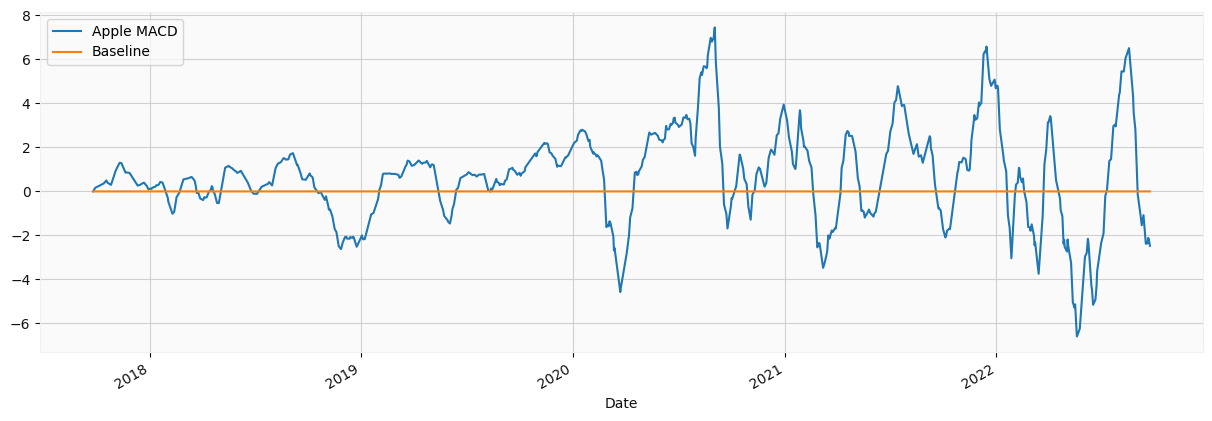

In [ ]:
Apple['MACD']= Apple['Close'].ewm(span=12, adjust=False).mean()-  Apple['Close'].ewm(span=26, adjust=False).mean()
Apple['Baseline']=0

Apple['MACD'].plot(label='Apple MACD', figsize=(15,5))
Apple['Baseline'].plot(label='Baseline')
plt.legend()

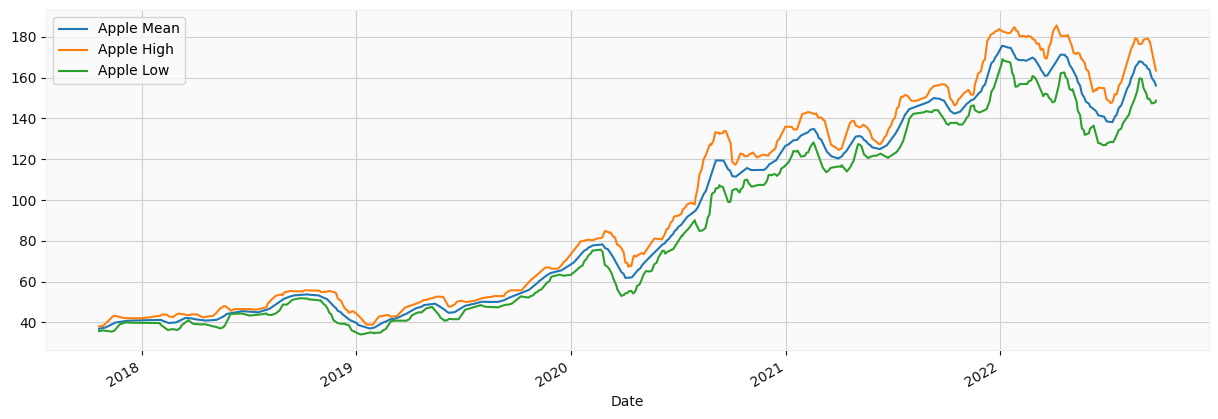

In [ ]:
window_of_days= 20
number_std=2
rolling_mean= Apple['Close'].rolling(window_of_days).mean()
rolling_std= Apple['Close'].rolling(window_of_days).std()
Apple['Rolling_Mean']= rolling_mean
Apple['Bollinger_High']= rolling_mean+ rolling_std*number_std
Apple['Bolling_low']= rolling_mean- rolling_std*number_std
Apple['Rolling_Mean'].plot(label='Apple Mean', figsize=(15,5))
Apple['Bollinger_High'].plot(label='Apple High', figsize=(15,5))
Apple['Bolling_low'].plot(label='Apple Low', figsize=(15,5))
plt.legend()

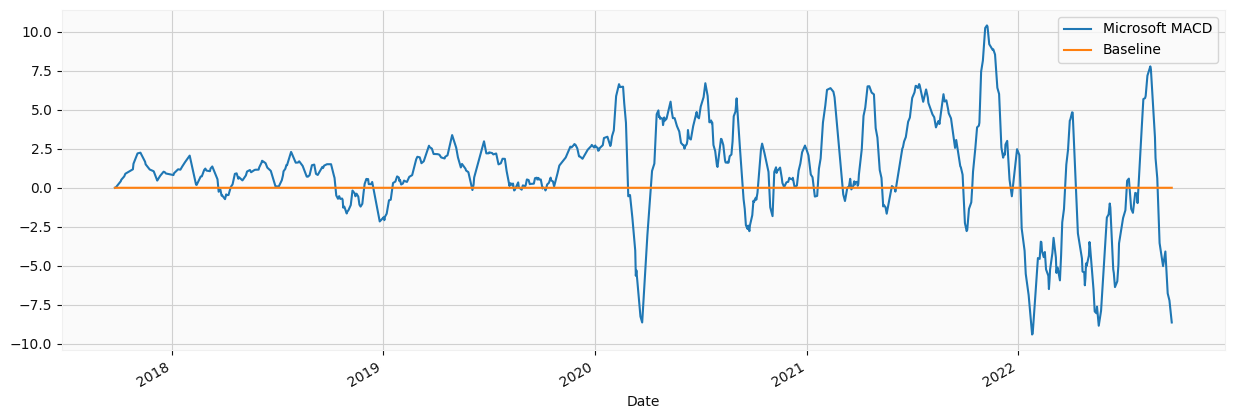

In [ ]:
Microsoft['MACD']= Microsoft['Close'].ewm(span=12, adjust=False).mean()-  Microsoft['Close'].ewm(span=26, adjust=False).mean()
Microsoft['Baseline']=0

Microsoft['MACD'].plot(label='Microsoft MACD', figsize=(15,5))
Microsoft['Baseline'].plot(label='Baseline')
plt.legend()

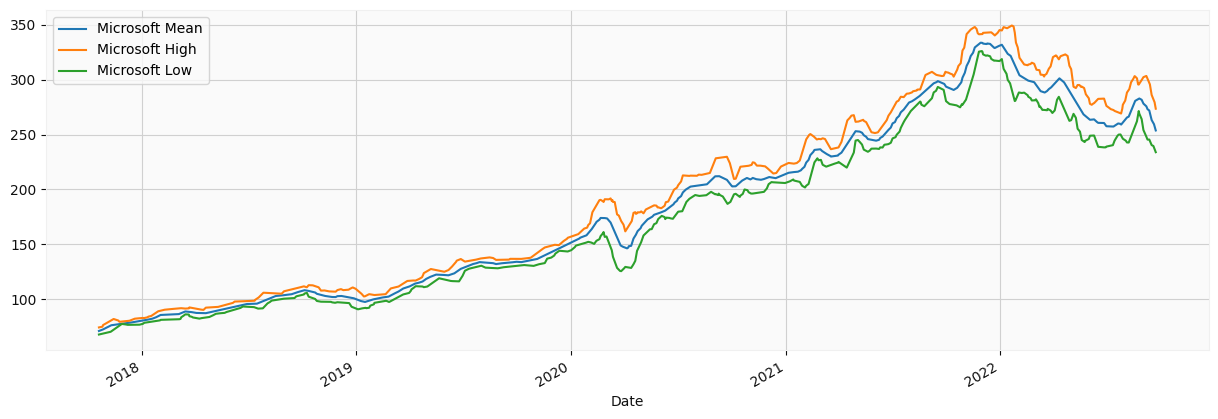

In [ ]:

window_of_days= 20
number_std=2
rolling_mean= Microsoft['Close'].rolling(window_of_days).mean()
rolling_std= Microsoft['Close'].rolling(window_of_days).std()
Microsoft['Rolling_Mean']= rolling_mean
Microsoft['Bollinger_High']= rolling_mean+ rolling_std*number_std
Microsoft['Bolling_low']= rolling_mean- rolling_std*number_std
Microsoft['Rolling_Mean'].plot(label='Microsoft Mean', figsize=(15,5))
Microsoft['Bollinger_High'].plot(label='Microsoft High', figsize=(15,5))
Microsoft['Bolling_low'].plot(label='Microsoft Low', figsize=(15,5))
plt.legend()

In [ ]:
etf = ['MSFT','AAPL','JPM']
Stock = yf.download(tickers=etf, period='5y')
Portfolio=Stock['Close']

[*********************100%***********************]  3 of 3 completed


In [ ]:
portfolio_weights= np.array([0.25,0.25,0.25])

In [ ]:
Portfolio_return= Portfolio/Portfolio.shift(1)
Portfolio_return.dropna()

,AAPL,JPM,MSFT
Date,,,
2017-09-26,1.017204,0.995538,1.000000
2017-09-27,1.007118,1.015795,1.008053
2017-09-28,0.993840,1.002101,1.000271
2017-09-29,1.005480,1.001363,1.008393
2017-10-02,0.997989,1.013925,1.001611
...,...,...,...
2022-09-19,1.025083,1.009224,0.999101
2022-09-20,1.015665,0.980281,0.991534
2022-09-21,0.979732,0.971165,0.985564


In [ ]:
portfolio_return_weighted= Portfolio_return.mul(portfolio_weights, axis=1)
portfolio_return_weighted

,AAPL,JPM,MSFT
Date,,,
2017-09-25,NaN,NaN,NaN
2017-09-26,0.254301,0.248884,0.250000
2017-09-27,0.251779,0.253949,0.252013
2017-09-28,0.248460,0.250525,0.250068
2017-09-29,0.251370,0.250341,0.252098
...,...,...,...
2022-09-19,0.256271,0.252306,0.249775
2022-09-20,0.253916,0.245070,0.247884
2022-09-21,0.244933,0.242791,0.246391


In [ ]:
!pip install dash 
import dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 7.8 MB/s 
     |████████████████████████████████| 357 kB 71.7 MB/s 


In [ ]:
def plot_chart(symbol, df):
    light_palette = {}
    light_palette["bg_color"] = "#ffffff"
    light_palette["plot_bg_color"] = "#ffffff"
    light_palette["grid_color"] = "#e6e6e6"
    light_palette["text_color"] = "#2e2e2e"
    light_palette["dark_candle"] = "#4d98c4"
    light_palette["light_candle"] = "#b1b7ba"
    light_palette["chop_color"] = "#c74e96"
    light_palette["border_color"] = "#2e2e2e"
    light_palette["color_1"] = "#5c285b"
    light_palette["color_2"] = "#802c62"
    light_palette["color_3"] = "#a33262"
    light_palette["color_4"] = "#c43d5c"
    light_palette["color_5"] = "#de4f51"
    light_palette["color_6"] = "#f26841"
    light_palette["color_7"] = "#fd862b"
    light_palette["color_8"] = "#ffa600"
    light_palette["color_9"] = "#3366d6"
    palette = light_palette
    #  Create sub plots
    fig = make_subplots(rows=4, cols=1, subplot_titles=[f"{symbol} Price Chart", '', '', 'Choppiness Index'], \
                        specs=[[{"rowspan": 3, "secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}],
                               [{"secondary_y": True}]], \
                        vertical_spacing=0.04, shared_xaxes=True)
    #  Plot close price
    fig.add_trace(go.Candlestick(x=df.index,
                                 open=df['Open'],
                                 close=df['Close'],
                                 low=df['Low'],
                                 high=df['High'],
                                 increasing_line_color=palette['light_candle'],
                                 decreasing_line_color=palette['dark_candle'], name='Price'), row=1, col=1)
    #  Add choppiness and trends
    for index, row in df.iterrows():
        if row['is_choppy_close'] is not None:
            fig.add_vline(x=row['is_choppy_close'], line_width=0.6, line_color=light_palette["color_3"], row=1, col=1)
        if row['is_trending_close'] is not None:
            fig.add_vline(x=row['is_trending_close'], line_width=0.6, line_color=light_palette["color_6"], row=1, col=1)
    #  Plot Choppiness Index
    fig.add_trace(go.Scatter(
        name='Choppiness Index',
        x=df.index, y=df['chop'], line=dict(color=palette['chop_color'], width=1)), row=4, col=1)
    #  Add Choppiness Thresholds
    choppy_threshold = 61.8
    trending_threshold = 38.2
    fig.add_hline(y=choppy_threshold, line_width=1.0, line_dash="dash", line_color="red", row=4, col=1)
    fig.add_hline(y=trending_threshold, line_width=1.0, line_dash="dash", line_color="green", row=4, col=1)
    fig.update_layout(
        title={'text': '', 'x': 0.5},
        font=dict(family="Verdana", size=12, color=palette["text_color"]),
        autosize=True,
        width=1280, height=720,
        xaxis={"rangeslider": {"visible": False}},
        plot_bgcolor=palette["plot_bg_color"],
        paper_bgcolor=palette["bg_color"])
    fig.update_yaxes(visible=False, secondary_y=True)
    #  Change grid colors
    fig.update_xaxes(showline=True, linewidth=1, linecolor=palette["grid_color"], gridcolor=palette["grid_color"])
    fig.update_yaxes(showline=True, linewidth=1, linecolor=palette["grid_color"], gridcolor=palette["grid_color"])
    return fig

In [ ]:
plot_chart()

TypeError: ignored

In [ ]:
if __name__ == '__main__':
    symbol = "MSFT"
    #  Download data
    # intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    interval = "60m"
    #  periods:  1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    data = yf.download(tickers=symbol, period="6mo", interval=interval)
    df = pd.DataFrame(data)
    df.dropna(inplace=True)
    df.reset_index(inplace=True)
    df = df.loc[300:500]
    #  Calculate Choppiness
    chop_length = 14
    atr_length = 1
    df['chop'] = ta.chop(high=df['High'], low=df['Low'], close=df['Close'], length=chop_length, atr_length=atr_length)
    #  Add conditions
    choppy_threshold = 61.8
    trending_threshold = 38.2
    df['is_choppy'] = np.where((df['chop'] > choppy_threshold), 1, 0)
    df['is_trending'] = np.where((df['chop'] < trending_threshold), 1, 0)
    df['is_choppy_close'] = np.where((df['is_choppy'] == 1), df.index, None)
    df['is_trending_close'] = np.where((df['is_trending'] == 1), df.index, None)
    #  Create plot
    fig = plot_chart(symbol, df)
    #  Start Dash app
    app = Dash()
    app.layout = html.Div(children=[
        html.H1(children='Choppiness Index Charts'),
        dcc.Graph(
            id='choppiness-index-charts',
            figure=fig)
    ])
    app.run_server(debug=True)

[*********************100%***********************]  1 of 1 completed


NameError: ignored

#Identificando El Tipo De Mercado

#Implementando Estrategia

#Enviar Alertas